In [21]:
import calendar
import numba
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import permutation_importance
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

filepath = "/content/drive/MyDrive/inteligencia/data/"
df_shopping_base = pd.read_csv(filepath + 'shopping.csv') 
df_shopping_base.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [22]:
print(df_shopping_base['VisitorType'].unique())
df_shop = df_shopping_base.replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})

monthlist = df_shop['Month'].replace('June', 'Jun')
mlist = []
m = np.array(monthlist)
for mi in m:
    a = list(calendar.month_abbr).index(mi)
    mlist.append(a)
df_shop['Month'] =  mlist

df_shop.dropna(inplace=True)

df_shop.head()

['Returning_Visitor' 'New_Visitor' 'Other']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,True,False


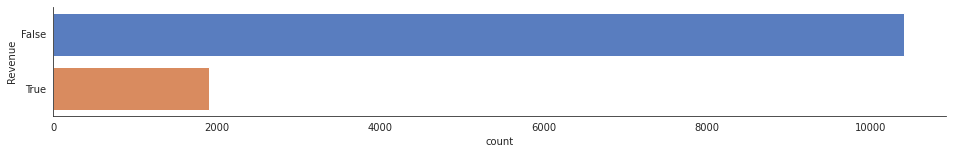

In [23]:
plt.figure(figsize=(16,2))
fig = sns.countplot(y="Revenue", data=df_shop, palette="muted")
plt.show()

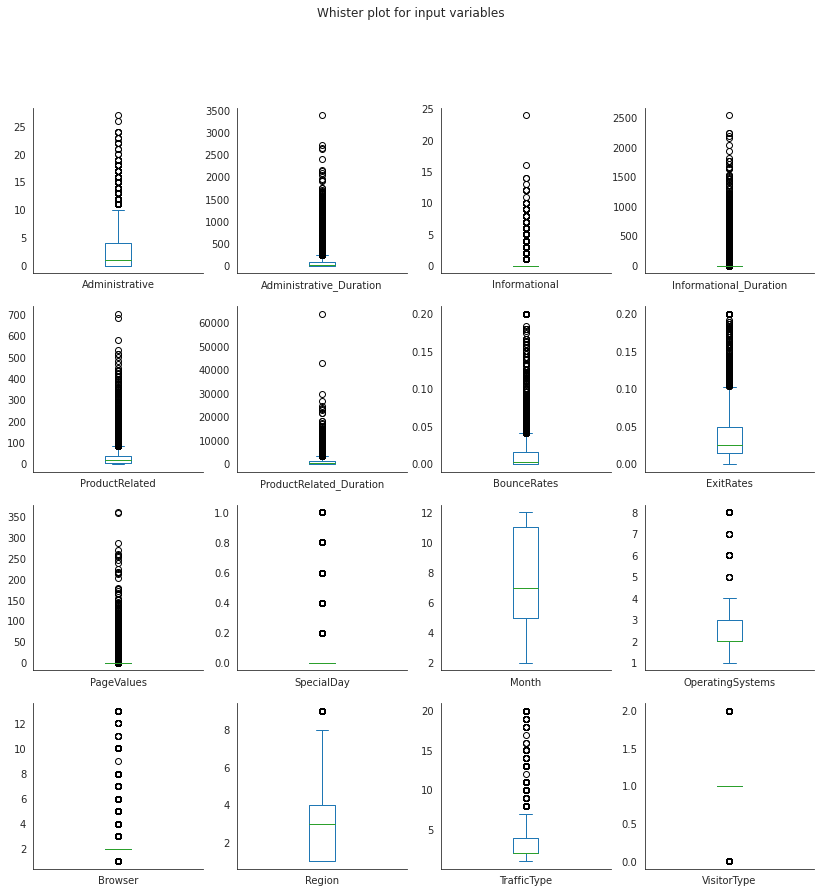

In [24]:
c = 'black'
df_shop.drop('Revenue', axis=1).plot(kind='box', 
                                subplots=True, layout=(4,4), 
                                sharex=False, sharey=False, 
                                figsize=(14,14), 
                                title='Whister plot for input variables')
plt.show()

ValueError: ignored

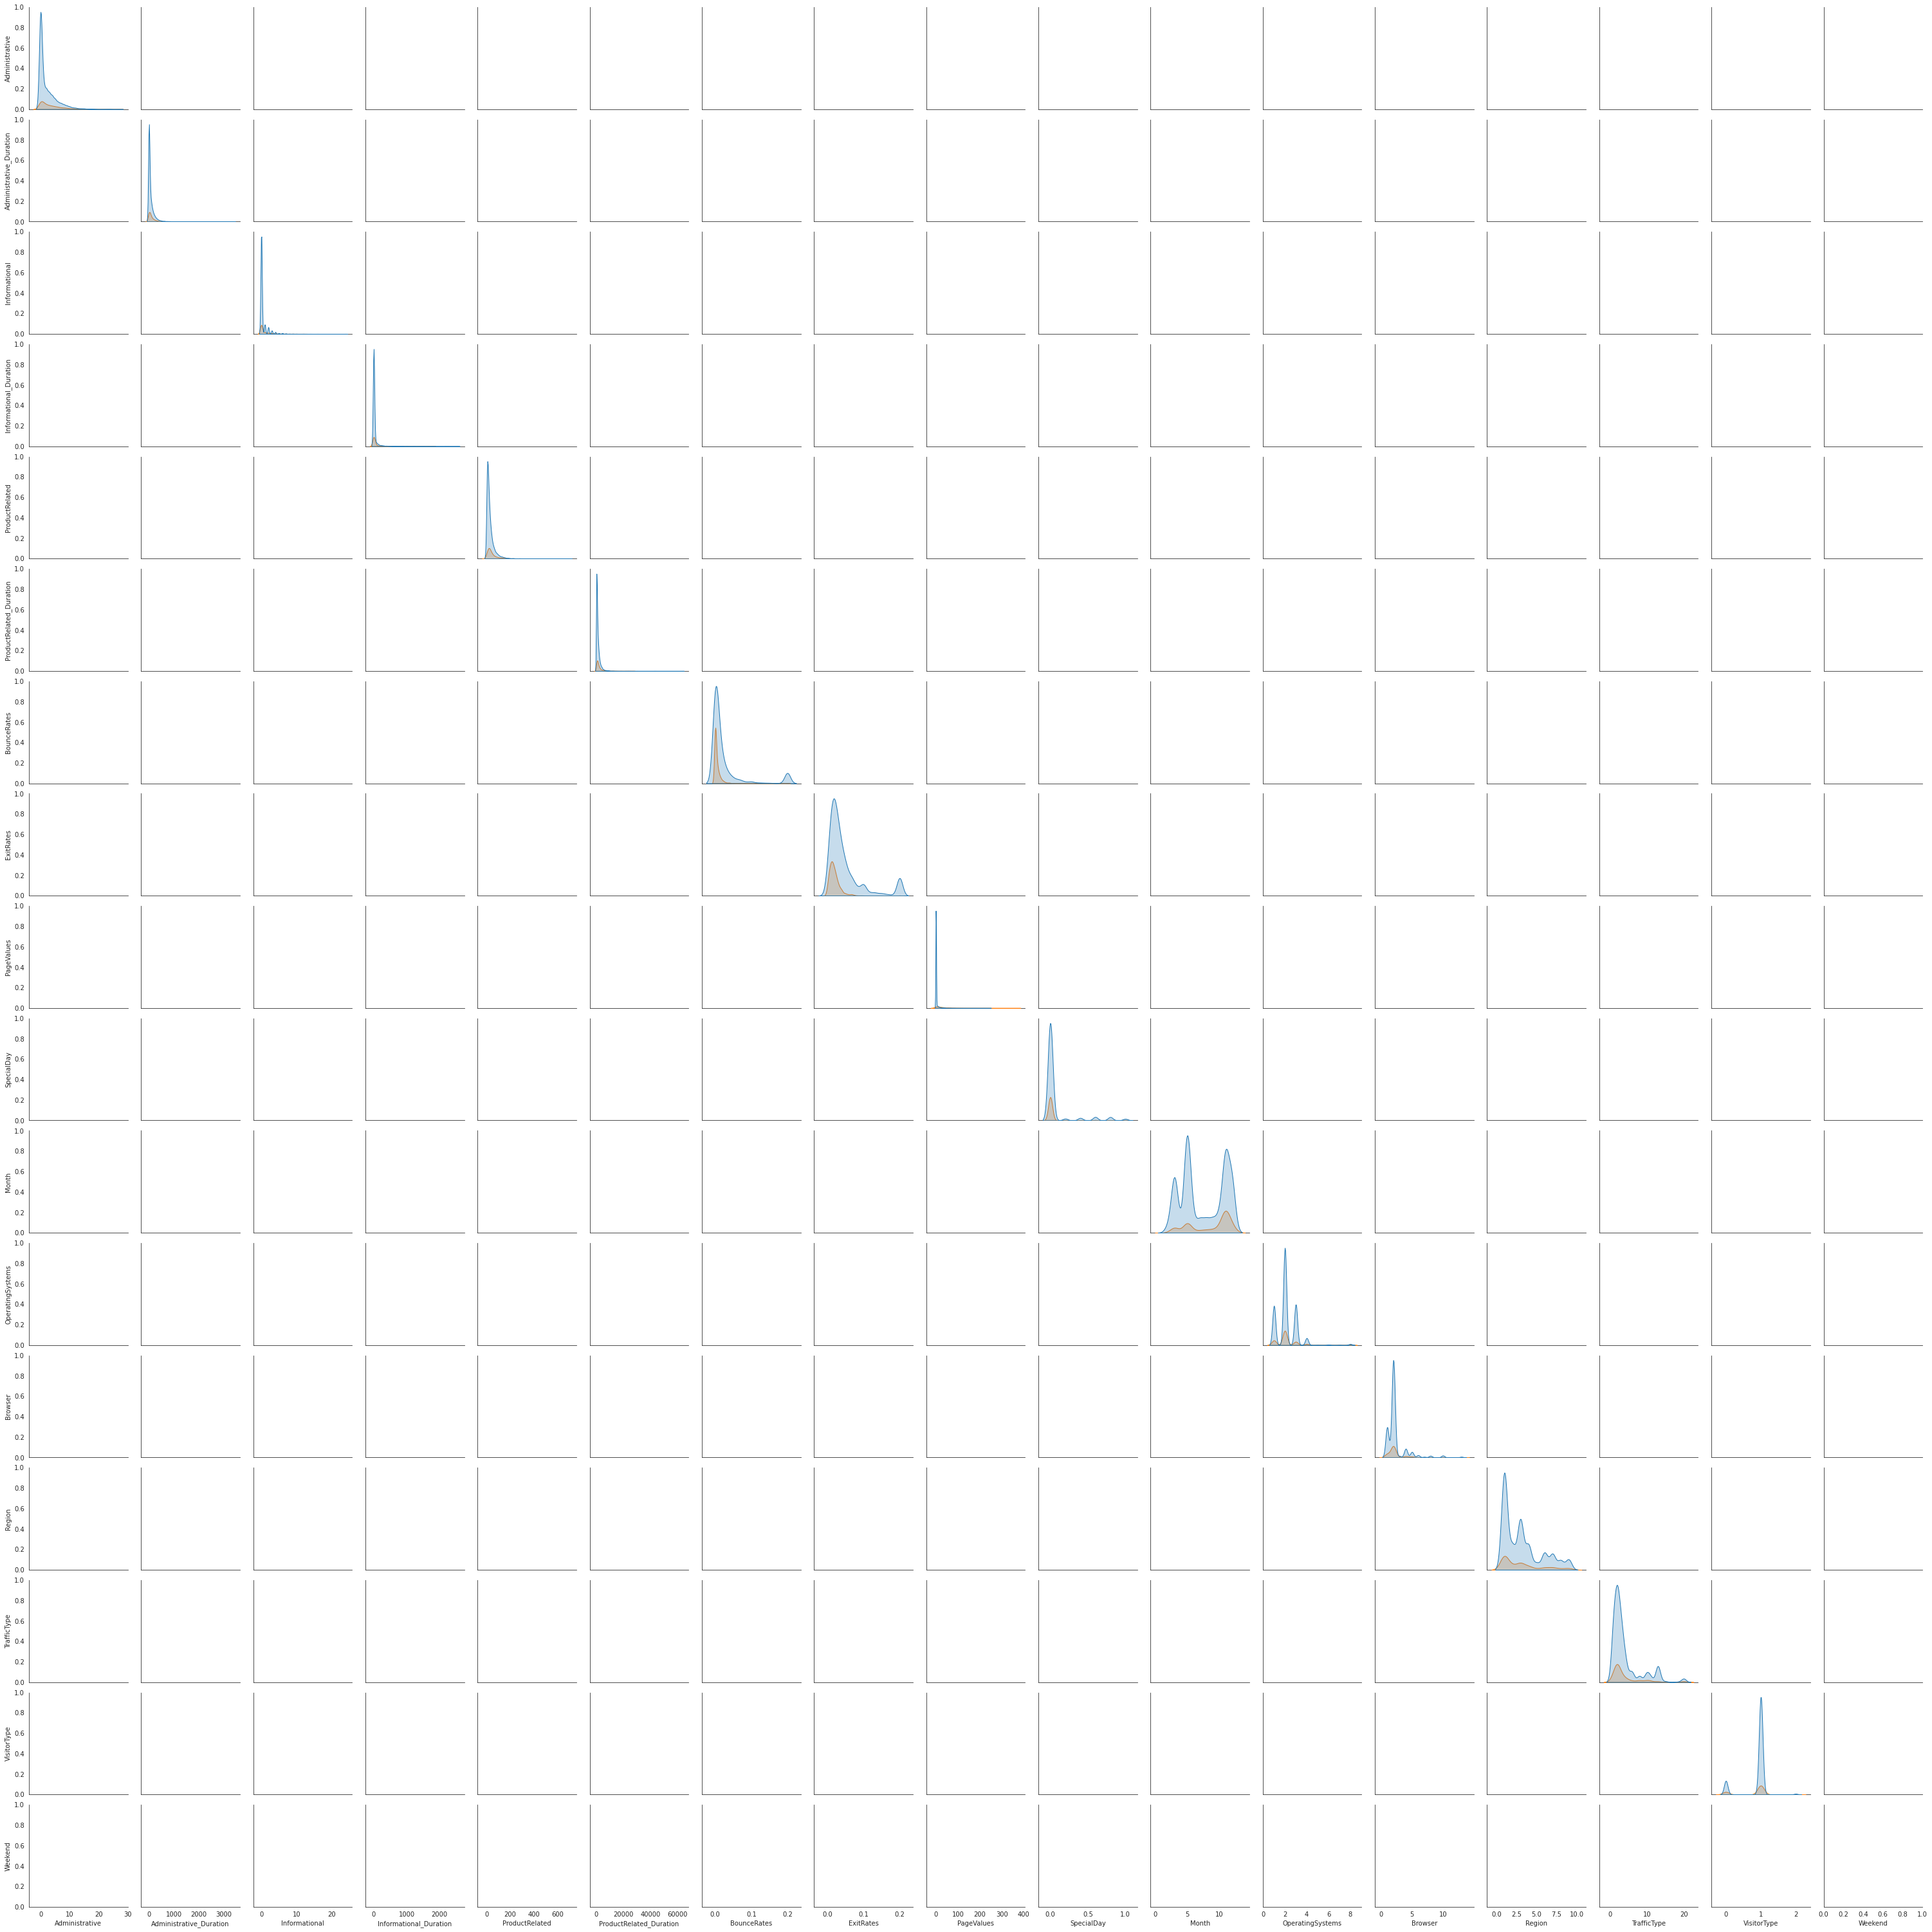

In [25]:
df_plot = df_shop.copy()

sns.pairplot(df_plot, hue="Revenue", height=2.5)

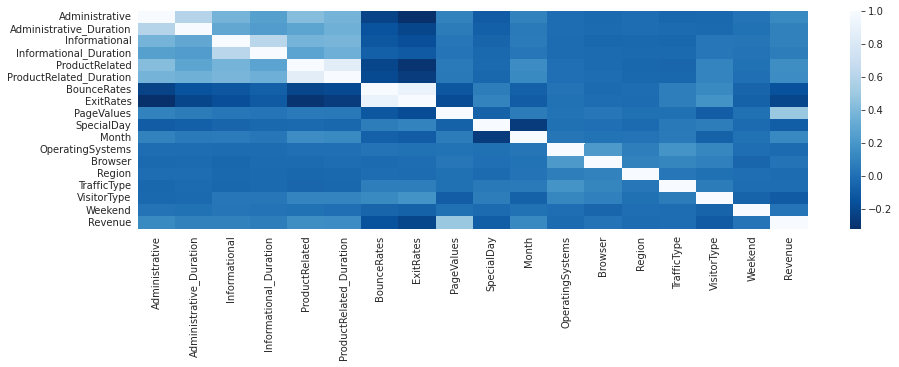

In [26]:
plt.figure(figsize=(15,4))
f_cor = df_shop.corr()
sns.heatmap(f_cor, cmap="Blues_r")

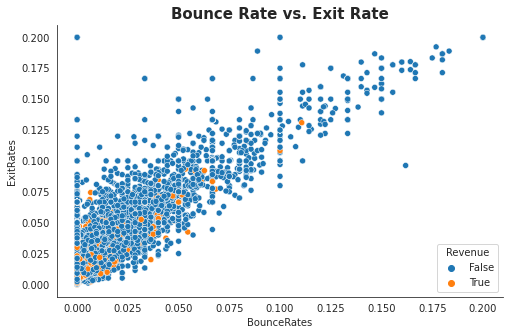

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df_shop,hue='Revenue')
plt.title('Bounce Rate vs. Exit Rate', fontweight='bold', fontsize=15)
plt.show()

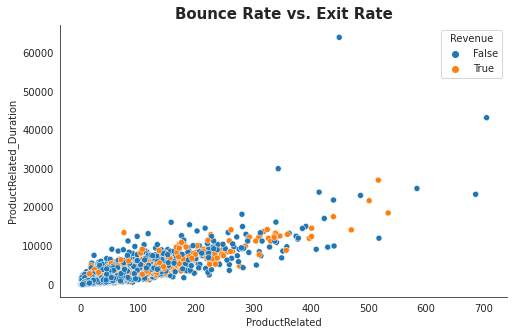

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'ProductRelated',y='ProductRelated_Duration',data=df_shop,hue='Revenue')
plt.title('Bounce Rate vs. Exit Rate', fontweight='bold', fontsize=15)
plt.show()

In [29]:
features = ['Administrative', 'Administrative_Duration', 'Informational', 
            'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 
            'Month', 'Region', 'TrafficType', 'VisitorType']
X = df_shop[features]
y = df_shop['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
logreg = LogisticRegression(solver='lbfgs')
score = logreg.fit(X_train, y_train).decision_function(X_test)

In [32]:
model_lgr = LogisticRegression(solver='lbfgs')
score = model_lgr.fit(X_train, y_train).decision_function(X_test)

Text(0.5, 384.16, 'Predicted label')

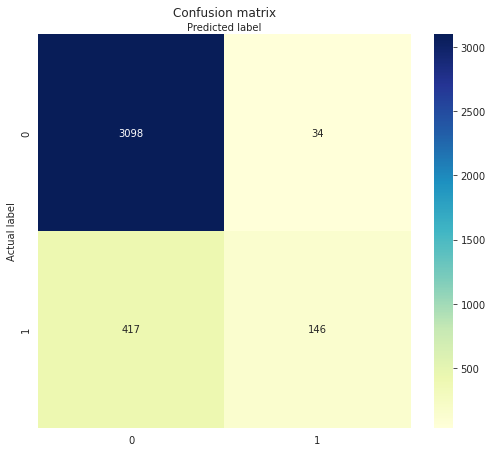

In [33]:
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True]
fig, ax = plt.subplots(figsize=(7, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.88
Precision: 0.81
Recall: 0.26
f1_score: 0.39


Text(0.5, 1.0, 'Logistic Regression Feature Importances')

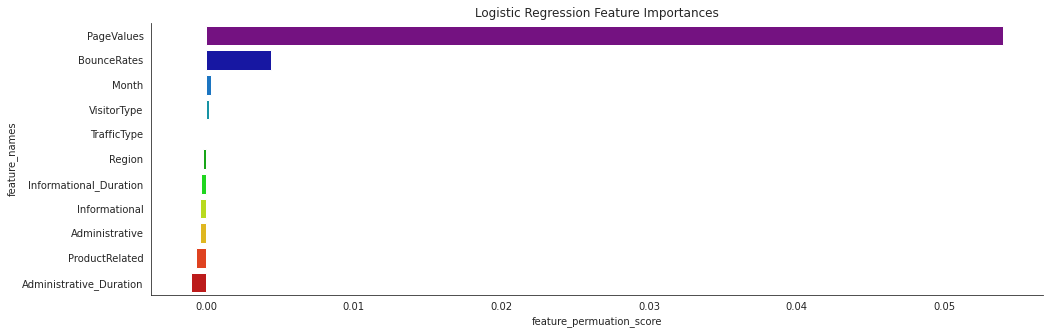

In [35]:
r = permutation_importance(model_lgr, X_test, y_test, n_repeats=30, random_state=0)

data_im = pd.DataFrame(r.importances_mean, columns=['feature_permuation_score'])
data_im['feature_names'] = X.columns
data_im = data_im.sort_values('feature_permuation_score', ascending=False)

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=data_im['feature_names'], x="feature_permuation_score", data=data_im, palette='nipy_spectral')
ax.set_title("Logistic Regression Feature Importances")